In [102]:
import pandas as pd
import matplotlib.pyplot as plt

rawDF = pd.read_csv("global-air-pollution-dataset.csv")

cleanedDF = rawDF.fillna('Unknown')

Distribution of Overall AQI Values

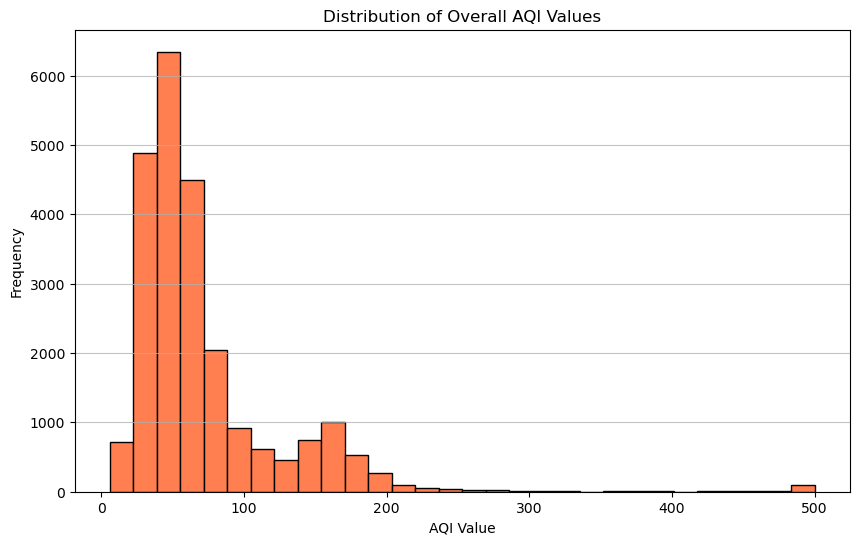

In [103]:
# Plot a bar chart for the distribution of overall AQI Values

plt.figure(figsize=(10, 6))
plt.hist(rawDF['AQI Value'], bins=30, color='coral', edgecolor='black')
plt.title('Distribution of Overall AQI Values')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()

Distribution of AQI Categories Across All Locations

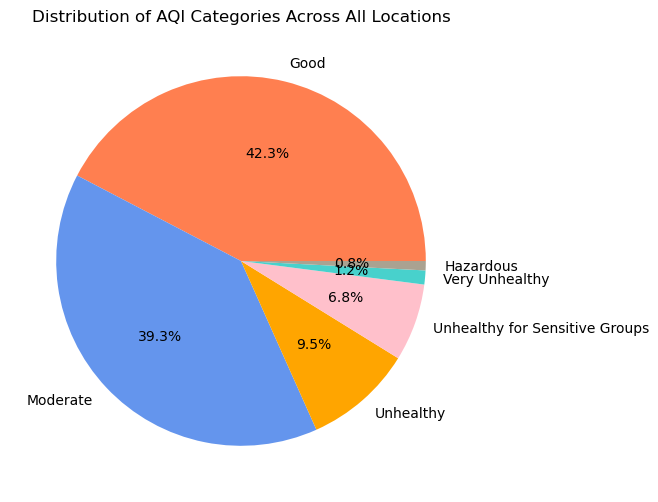

In [104]:
# Count the frequency of each AQI category
aqiCategoryCounts = rawDF['AQI Category'].value_counts()

# Initialize labels, sizes, and colors
labels = aqiCategoryCounts.index
sizes = aqiCategoryCounts.values
colors = ['coral', 'cornflowerblue', 'orange', 'pink', 'mediumturquoise', '#AAA291']

# Plotting the distribution of AQI categories
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',  colors=colors)
plt.title('Distribution of AQI Categories Across All Locations')

plt.show()


Counts of each AQI Category

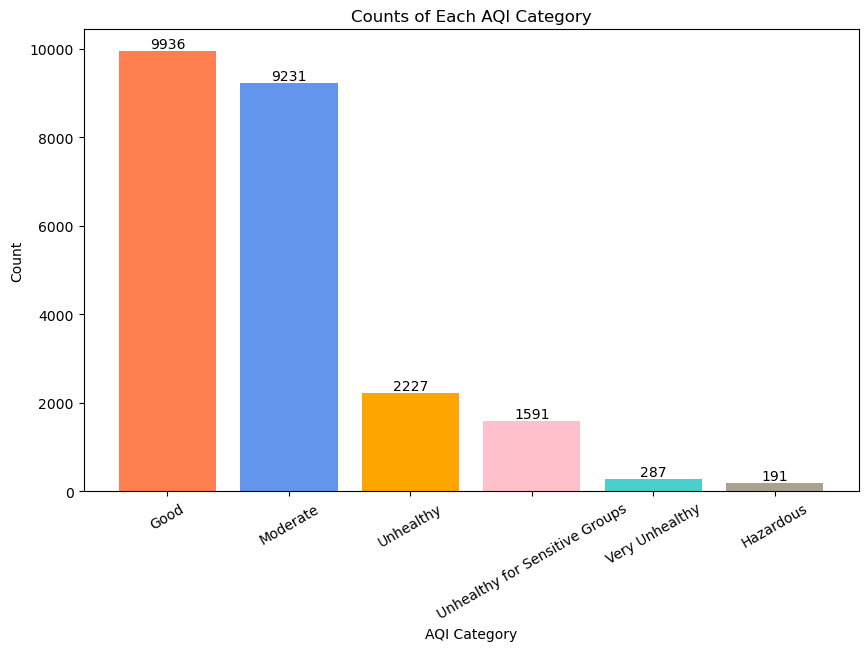

In [105]:
# Initialize the colors
colors = ['coral', 'cornflowerblue', 'orange', 'pink', 'mediumturquoise', '#AAA291']

# Plot the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(aqiCategoryCounts.index, aqiCategoryCounts.values, color=colors)

# Adding the count above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

# Add aesthetics
plt.title('Counts of Each AQI Category')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()


Top 5 Countries with Highest Average AQI

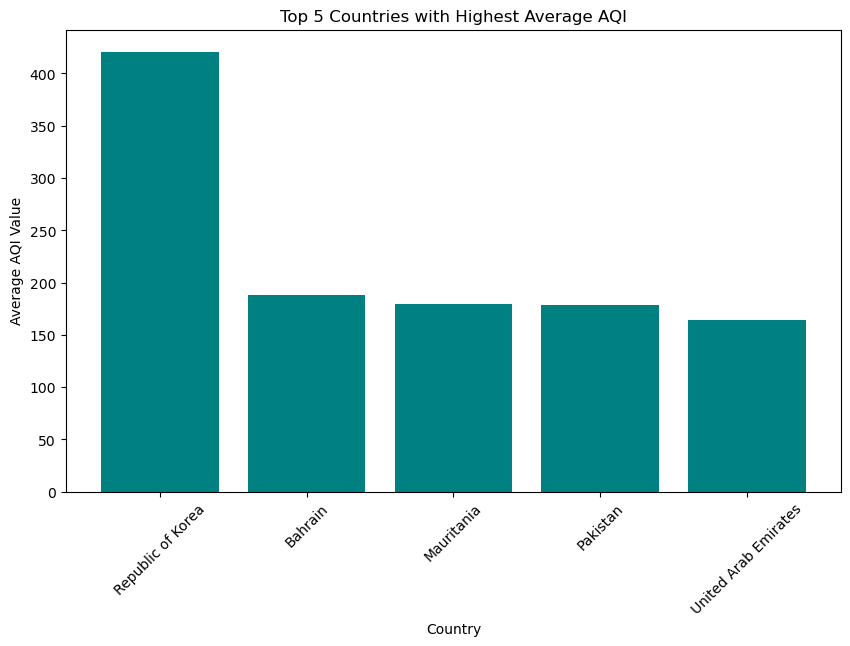

In [106]:
# Calculate the average AQI for each country
avgAqiByCountry = cleanedDF.groupby('Country')['AQI Value'].mean().sort_values(ascending=False).head(5)

# Extracting country names and their corresponding average AQI values
countries = avgAqiByCountry.index.tolist()
avgAqiValues = avgAqiByCountry.values

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(countries, avgAqiValues, color='teal')

plt.title('Top 5 Countries with Highest Average AQI')
plt.xlabel('Country')
plt.ylabel('Average AQI Value')
plt.xticks(rotation=45)  # Rotate country names for better readability

plt.show()


Top 5 Countries with Highest Average AQI (Minimum of 10 Entries).

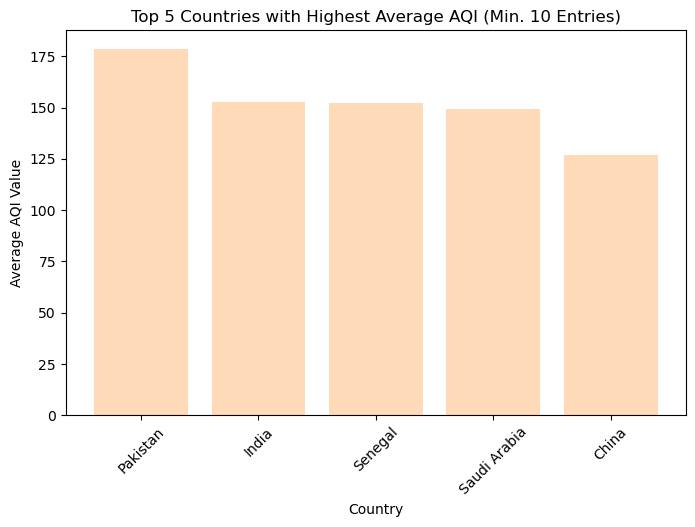

In [113]:
# Filtering countries that appear more than 10 times in the dataset
countryCounts = cleanedDF['Country'].value_counts()
countriesWithTenPlusEntries = countryCounts[countryCounts > 10].index.tolist()

# Recalculating the top 5 countries
avgAqiByCountryFiltered = cleanedDF[cleanedDF['Country'].isin(countriesWithTenPlusEntries)].groupby('Country')['AQI Value'].mean().sort_values(ascending=False).head(5)

countriesFiltered = avgAqiByCountryFiltered.index.tolist()
avgAqiValuesFiltered = avgAqiByCountryFiltered.values

# Plotting the chart
plt.figure(figsize=(8, 5))
plt.bar(countriesFiltered, avgAqiValuesFiltered, color='peachpuff')

plt.title('Top 5 Countries with Highest Average AQI (Min. 10 Entries)')
plt.xlabel('Country')
plt.ylabel('Average AQI Value')
plt.xticks(rotation=45)  # Rotate country names for better readability

plt.show()


Average Pollutant Levels in Countries with Highest Average AQI (Min. 10 Entries)

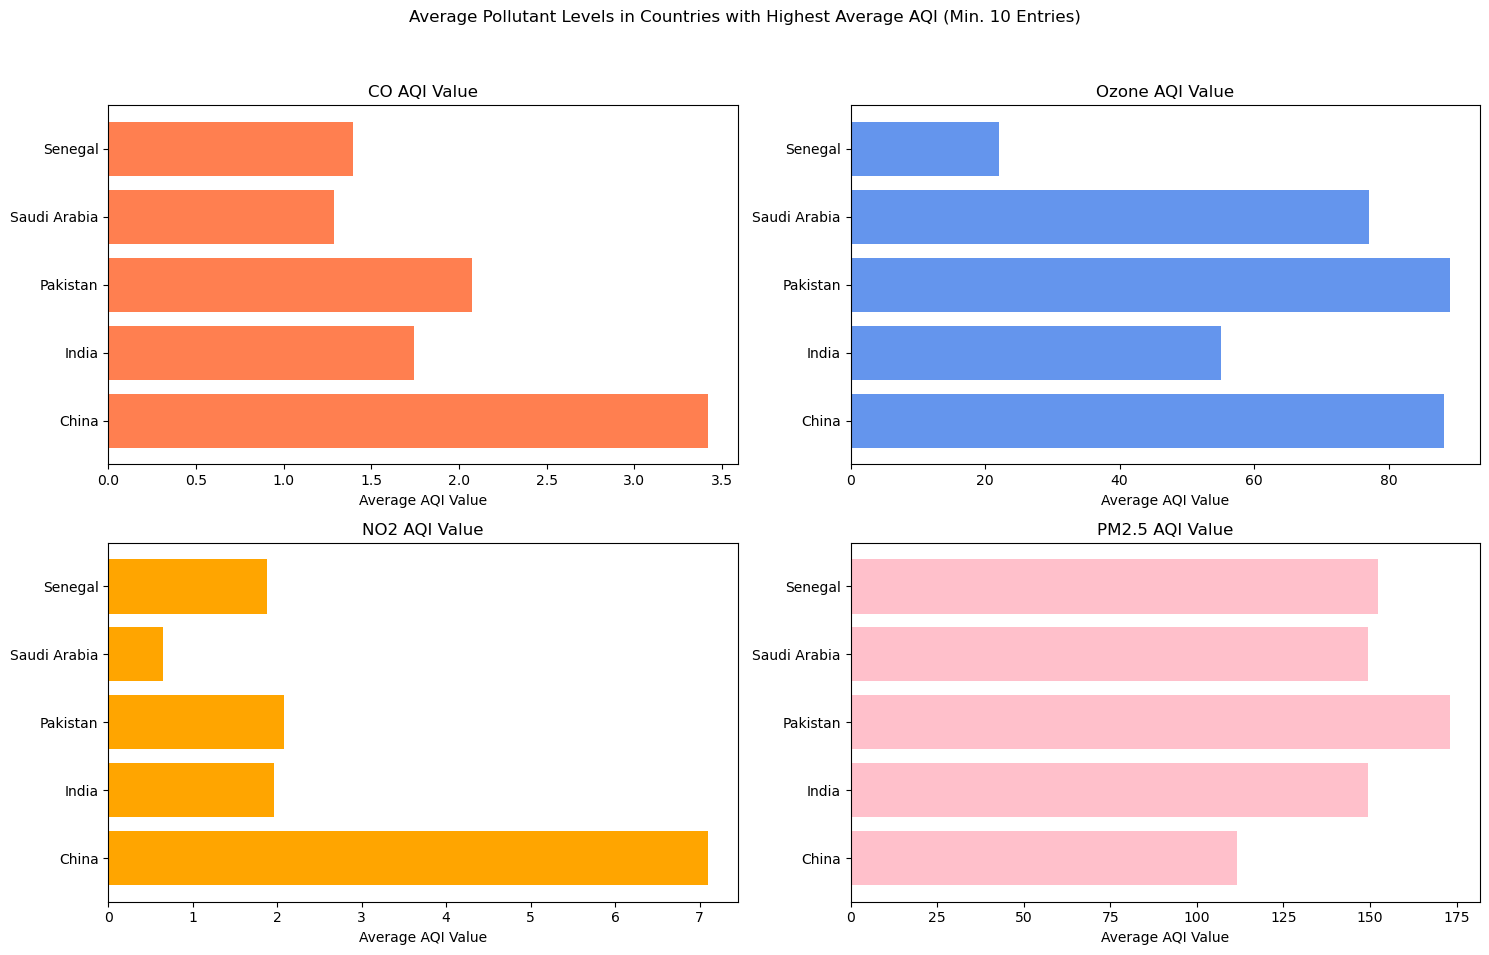

In [108]:
# Set the top countries that were filtered for a minimum of 10 entries from the last graph
topCountriesFiltered = ['Pakistan', 'India', 'Senegal', 'Saudi Arabia', 'China']
pollutants = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

# Find the average pollutants by country
avgPollutantsByCountry = cleanedDF[cleanedDF['Country'].isin(topCountriesFiltered)].groupby('Country')[pollutants].mean()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Average Pollutant Levels in Countries with Highest Average AQI (Min. 10 Entries)')

# CO AQI Value
axs[0, 0].barh(avgPollutantsByCountry.index, avgPollutantsByCountry['CO AQI Value'], color='coral')
axs[0, 0].set_title('CO AQI Value')
axs[0, 0].set_xlabel('Average AQI Value')

# Ozone AQI Value
axs[0, 1].barh(avgPollutantsByCountry.index, avgPollutantsByCountry['Ozone AQI Value'], color='cornflowerblue')
axs[0, 1].set_title('Ozone AQI Value')
axs[0, 1].set_xlabel('Average AQI Value')

# NO2 AQI Value
axs[1, 0].barh(avgPollutantsByCountry.index, avgPollutantsByCountry['NO2 AQI Value'], color='orange')
axs[1, 0].set_title('NO2 AQI Value')
axs[1, 0].set_xlabel('Average AQI Value')

# PM2.5 AQI Value
axs[1, 1].barh(avgPollutantsByCountry.index, avgPollutantsByCountry['PM2.5 AQI Value'], color='pink')
axs[1, 1].set_title('PM2.5 AQI Value')
axs[1, 1].set_xlabel('Average AQI Value')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
